# Hierarchical and parallel computing

Solver "workflow"

* Asynchronous and "re-distributable" modes

In [ ]:
>>> from mystic.solvers import NelderMeadSimplexSolver
>>> from mystic.models import rosen
>>> 
>>> solver = NelderMeadSimplexSolver(3)
>>> solver.SetInitialPoints([0.5, 1.5, 2.0])
>>> solver.SetObjective(rosen)
>>>            
>>> from mystic.monitors import VerboseMonitor
>>> mon = VerboseMonitor(1)
>>> 
>>> solver.SetGenerationMonitor(mon)
>>> solver.Step()
Generation 0 has Chi-Squared: 163.000000
>>> solver.Step()
Generation 1 has Chi-Squared: 156.635039
>>> solver.Step()
Generation 2 has Chi-Squared: 123.476914
>>> solver.Step()
Generation 3 has Chi-Squared: 123.476914
>>> solver.Step()
Generation 4 has Chi-Squared: 105.163966
>>> solver.Step()
Generation 5 has Chi-Squared: 105.163966
>>> solver.Step()
Generation 6 has Chi-Squared: 105.163966
>>> solver.SaveSolver('test.pkl')
DUMPED("test.pkl")

In [ ]:
dude@hilbert>$ python
Python 2.7.9 (default, Dec 11 2014, 01:21:43) 
[GCC 4.2.1 Compatible Apple Clang 4.1 ((tags/Apple/clang-421.11.66))] on darwin
Type "help", "copyright", "credits" or "license" for more information.
>>> from mystic.solvers import LoadSolver             
>>> solver = LoadSolver('test.pkl')
LOADED("test.pkl")
>>> solver.Step()
Generation 7 has Chi-Squared: 105.163966
>>> solver.Step()
Generation 8 has Chi-Squared: 94.683952
>>> solver.Step()
Generation 9 has Chi-Squared: 79.526211
>>> solver.Solve()
Generation 10 has Chi-Squared: 55.152242
Generation 11 has Chi-Squared: 32.635518
Generation 12 has Chi-Squared: 3.928963
Generation 13 has Chi-Squared: 0.293739
Generation 14 has Chi-Squared: 0.293739
Generation 15 has Chi-Squared: 0.293739
Generation 16 has Chi-Squared: 0.293739
Generation 17 has Chi-Squared: 0.293739
Generation 18 has Chi-Squared: 0.293739
Generation 19 has Chi-Squared: 0.293739
Generation 20 has Chi-Squared: 0.293739
Generation 21 has Chi-Squared: 0.234180
Generation 22 has Chi-Squared: 0.097215
Generation 23 has Chi-Squared: 0.058144
Generation 24 has Chi-Squared: 0.058144
Generation 25 has Chi-Squared: 0.050947
Generation 26 has Chi-Squared: 0.035904
Generation 27 has Chi-Squared: 0.023215
Generation 28 has Chi-Squared: 0.007698
Generation 29 has Chi-Squared: 0.007698
Generation 30 has Chi-Squared: 0.007698
Generation 31 has Chi-Squared: 0.004759
Generation 32 has Chi-Squared: 0.004759
Generation 33 has Chi-Squared: 0.004442
Generation 34 has Chi-Squared: 0.003676
Generation 35 has Chi-Squared: 0.003676
Generation 36 has Chi-Squared: 0.003676
Generation 37 has Chi-Squared: 0.003609
Generation 38 has Chi-Squared: 0.003133
Generation 39 has Chi-Squared: 0.003133
Generation 40 has Chi-Squared: 0.002982
Generation 41 has Chi-Squared: 0.002982
Generation 42 has Chi-Squared: 0.002982
Generation 43 has Chi-Squared: 0.002982
Generation 44 has Chi-Squared: 0.002725
Generation 45 has Chi-Squared: 0.002716
Generation 46 has Chi-Squared: 0.002716
Generation 47 has Chi-Squared: 0.002457
Generation 48 has Chi-Squared: 0.002350
Generation 49 has Chi-Squared: 0.001738
Generation 50 has Chi-Squared: 0.001738
Generation 51 has Chi-Squared: 0.001631
Generation 52 has Chi-Squared: 0.000667
Generation 53 has Chi-Squared: 0.000651
Generation 54 has Chi-Squared: 0.000635
Generation 55 has Chi-Squared: 0.000008
Generation 56 has Chi-Squared: 0.000008
Generation 57 has Chi-Squared: 0.000008
Generation 58 has Chi-Squared: 0.000008
Generation 59 has Chi-Squared: 0.000008
Generation 60 has Chi-Squared: 0.000008
Generation 61 has Chi-Squared: 0.000008
Generation 62 has Chi-Squared: 0.000008
Generation 63 has Chi-Squared: 0.000008
Generation 64 has Chi-Squared: 0.000008
Generation 65 has Chi-Squared: 0.000008
Generation 66 has Chi-Squared: 0.000008
Generation 67 has Chi-Squared: 0.000007
Generation 68 has Chi-Squared: 0.000004
Generation 69 has Chi-Squared: 0.000001
Generation 70 has Chi-Squared: 0.000001
Generation 71 has Chi-Squared: 0.000001
Generation 72 has Chi-Squared: 0.000001
Generation 73 has Chi-Squared: 0.000000
Generation 74 has Chi-Squared: 0.000000
Generation 75 has Chi-Squared: 0.000000
Generation 76 has Chi-Squared: 0.000000
Generation 77 has Chi-Squared: 0.000000
Generation 78 has Chi-Squared: 0.000000
Generation 79 has Chi-Squared: 0.000000
Generation 80 has Chi-Squared: 0.000000
Generation 81 has Chi-Squared: 0.000000
Generation 82 has Chi-Squared: 0.000000
Generation 83 has Chi-Squared: 0.000000
Generation 84 has Chi-Squared: 0.000000
Generation 85 has Chi-Squared: 0.000000
Generation 86 has Chi-Squared: 0.000000
Generation 87 has Chi-Squared: 0.000000
Generation 88 has Chi-Squared: 0.000000
STOP("CandidateRelativeTolerance with {'xtol': 0.0001, 'ftol': 0.0001}")
DUMPED("test.pkl")

* Restarts and auto-saved state

In [3]:
from mystic.solvers import PowellDirectionalSolver
from mystic.termination import VTR
from mystic.models import rosen
from mystic.solvers import LoadSolver
import os

solver = PowellDirectionalSolver(3)
solver.SetRandomInitialPoints([0.,0.,0.],[10.,10.,10.])
term = VTR()
tmpfile = 'mysolver.pkl'
solver.SetSaveFrequency(10, tmpfile)
solver.Solve(rosen, term)
x = solver.bestSolution
y = solver.bestEnergy
_solver = LoadSolver(tmpfile)
os.remove(tmpfile)
assert all(x == _solver.bestSolution)
assert y == _solver.bestEnergy

* Database integration and results caching/kriging

See the `klepto` package, which can save pickled objects to a databases or "file-based" databases. `klepto` also provides a caching decorator that integrates well with `mystic`.

* Extension to parallel computing

In [5]:
from multiprocess import Pool
#from pathos.multiprocessing import ProcessPool as Pool
from numpy.random import random
from mystic.solvers import fmin_powell as solver
from mystic.models import zimmermann as model

dim = 2
tries = 20

def helper(solver, model):
    def f(x0, *args, **kwds):
        return solver(model, x0, disp=False, full_output=True, *args, **kwds)[:2]
    return f

# soln = solver(model, 10*random((dim)), disp=False, full_output=True)


if __name__ == '__main__':
    from multiprocess import freeze_support
    freeze_support()

    p = Pool()
    uimap = getattr(p, 'uimap',None) or p.imap_unordered
    res = uimap(helper(solver, model), 10*random((tries,dim)))

    for soln in res:
        print("%s: %s" % (soln[1],soln[0]))
    
    p.close()
    p.join()

1.08062639623: [ 2.66805477  5.25131884]
1.50754264281: [ 3.60783111  3.88462624]
1.4375855174: [ 4.31332785  3.24908663]
1.00907866114: [ 2.59774282  5.39317851]
1.41724643517: [ 4.39168124  3.19107232]
1.5082550008: [ 3.87424007  3.61750493]
1.33480489793: [ 3.01073629  4.65445882]
0.143385321576: [ 6.79652862  2.06008606]
0.595583282014: [ 6.11338581  2.29103091]
0.399795029281: [ 6.41832897  2.181876  ]
0.432012775069: [ 6.36924687  2.19874036]
1.33040920565: [ 3.00271869  4.6668721 ]
3.93507448848e-12: [ 7.  2.]
0.254801468162: [ 6.63469483  2.11050371]
0.160586205569: [ 6.7717705   2.06764329]
0.211754143135: [ 6.69764171  2.09060415]
0.823337392666: [ 2.44327219  5.73339041]
0.839492932743: [ 2.45542309  5.70508398]
0.696800689553: [ 2.3547099   5.94848941]
1.47015732921e-12: [ 7.  2.]


In [7]:
%matplotlib inline

Powell's Method
[id: 0] Generation 0 has Chi-Squared: 5090472.230904
[id: 0] Generation 0 has fit parameters:
 [0.0, -150.0, -150.0, -150.0, -225.0, 0.0, 0.0, 0.0, 0.0]
[id: 0] Generation 10 has Chi-Squared: 1046.751217
[id: 0] Generation 20 has Chi-Squared: 1046.039952
STOP("NormalizedChangeOverGeneration with {'tolerance': 0.0001, 'generations': 10}")
[id: 1] Generation 0 has Chi-Squared: 3356901.232727
[id: 1] Generation 0 has fit parameters:
 [0.0, -150.0, -150.0, -150.0, -75.0, 0.0, 0.0, 0.0, 0.0]
[id: 1] Generation 10 has Chi-Squared: 627.485178
[id: 1] Generation 20 has Chi-Squared: 223.819672
STOP("NormalizedChangeOverGeneration with {'tolerance': 0.0001, 'generations': 10}")
[id: 2] Generation 0 has Chi-Squared: 2169690.600920
[id: 2] Generation 0 has fit parameters:
 [0.0, -150.0, -150.0, -150.0, 75.0, 0.0, 0.0, 0.0, 0.0]
[id: 2] Generation 10 has Chi-Squared: 550.783865
STOP("NormalizedChangeOverGeneration with {'tolerance': 0.0001, 'generations': 10}")
[id: 3] Generation 0 

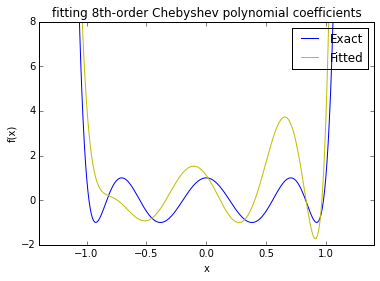

In [18]:
"""
Example:
    - Solve 8th-order Chebyshev polynomial coefficients with Powell's method.
    - Uses LatticeSolver to provide 'pseudo-global' optimization
    - Plot of fitting to Chebyshev polynomial.

Demonstrates:
    - standard models
    - minimal solver interface
"""
# the Buckshot solver
from mystic.solvers import LatticeSolver

# Powell's Directonal solver
from mystic.solvers import PowellDirectionalSolver

# Chebyshev polynomial and cost function
from mystic.models.poly import chebyshev8, chebyshev8cost
from mystic.models.poly import chebyshev8coeffs

# if available, use a pathos worker pool
try:
    #from pathos.pools import ProcessPool as Pool
    from pathos.pools import ParallelPool as Pool
except ImportError:
    from mystic.pools import SerialPool as Pool

# tools
from mystic.termination import NormalizedChangeOverGeneration as NCOG
from mystic.math import poly1d
from mystic.monitors import VerboseLoggingMonitor
from mystic.tools import getch
import pylab
pylab.ion()

# draw the plot
def plot_exact():
    pylab.title("fitting 8th-order Chebyshev polynomial coefficients")
    pylab.xlabel("x")
    pylab.ylabel("f(x)")
    import numpy
    x = numpy.arange(-1.2, 1.2001, 0.01)
    exact = chebyshev8(x)
    pylab.plot(x,exact,'b-')
    pylab.legend(["Exact"])
    pylab.axis([-1.4,1.4,-2,8],'k-')
    pylab.draw()
    return

# plot the polynomial
def plot_solution(params,style='y-'):
    import numpy
    x = numpy.arange(-1.2, 1.2001, 0.01)
    f = poly1d(params)
    y = f(x)
    pylab.plot(x,y,style)
    pylab.legend(["Exact","Fitted"])
    pylab.axis([-1.4,1.4,-2,8],'k-')
    pylab.draw()
    return



if __name__ == '__main__':
    from pathos.helpers import freeze_support
    freeze_support() # help Windows use multiprocessing

    print "Powell's Method"
    print "==============="

    # dimensional information
    from mystic.tools import random_seed
    random_seed(123)
    ndim = 9
    npts = 32

    # draw frame and exact coefficients
    plot_exact()

    # configure monitor
    stepmon = VerboseLoggingMonitor(1,10)

    # use lattice-Powell to solve 8th-order Chebyshev coefficients
    solver = LatticeSolver(ndim, npts)
    solver.SetNestedSolver(PowellDirectionalSolver)
    solver.SetMapper(Pool().map)
    solver.SetGenerationMonitor(stepmon)
    solver.SetStrictRanges(min=[-300]*ndim, max=[300]*ndim)
    solver.Solve(chebyshev8cost, NCOG(1e-4), disp=1)
    solution = solver.Solution()

    # write 'convergence' support file
    from mystic.munge import write_support_file
    write_support_file(solver._stepmon) #XXX: only saves the 'best'

    # use pretty print for polynomials
    print poly1d(solution)

    # compare solution with actual 8th-order Chebyshev coefficients
    print "\nActual Coefficients:\n %s\n" % poly1d(chebyshev8coeffs)

    # plot solution versus exact coefficients
    plot_solution(solution)
    #getch()

* Not covered: dimensional reduction

Hierarchical and meta-solvers:

* "Nesting" solvers

* Ensemble solvers

* Global search

In [21]:
!rm log.txt

rm: log.txt: No such file or directory


In [4]:
"""
Uses Ensemble Solvers to provide 'pseudo-global' search.
"""
# the ensemble solvers
from mystic.solvers import BuckshotSolver, LatticeSolver

# the local solvers
from mystic.solvers import PowellDirectionalSolver, NelderMeadSimplexSolver

# cost function
#from mystic.models import rosen as model
#from mystic.models import schwefel as model
from mystic.models import griewangk as model
#from mystic.models import rastrigin as model
#from mystic.models import ackley as model
#from mystic.models import peaks as model
#from mystic.models import branins as model

# if available, use a multiprocessing worker pool
try:
    from pathos.multiprocessing import ProcessingPool as Pool
except ImportError:
    from mystic.python import PythonSerial as Pool

# tools
from mystic.termination import VTR, ChangeOverGeneration as COG
from mystic.termination import NormalizedChangeOverGeneration as NCOG
from mystic.monitors import LoggingMonitor, VerboseMonitor, Monitor

def solve(cost, bounds, sprayer, seeker, stop, npts, _map, id=None, disp=True):
    # configure monitor
    stepmon = LoggingMonitor(1)
#   stepmon = VerboseMonitor(1)
#   stepmon = Monitor()

    # get dimensions
    ndim = len(bounds)
    _min, _max = zip(*bounds)

    # solve with ensemble solver
    solver = sprayer(ndim, npts)
    solver.id = id
    solver.SetNestedSolver(seeker)
    solver.SetMapper(_map)
    solver.SetGenerationMonitor(stepmon)
    solver.SetStrictRanges(min=_min, max=_max)
    solver.Solve(cost, stop, disp=disp)
    return solver

def print_results(solver, tol=8):
    for _solver in solver._allSolvers:
        bestSol = tuple(round(s, tol) for s in _solver.bestSolution)
        bestRes = round(_solver.bestEnergy, tol)
        print (bestSol, bestRes)

def memoize(solver, archive, tol=1):
    from klepto import inf_cache
    from klepto.keymaps import keymap

    km = keymap()
    ca = inf_cache(tol=tol, ignore=('**','out'), cache=archive, keymap=km)

    @ca #XXX: klepto rounding fails to recognize -0.0 is 0.0
    def memo(*args, **kwds):
        return kwds['out']

    for _solver in solver._allSolvers:
        bestSol = tuple(_solver.bestSolution)
        bestRes = float(_solver.bestEnergy)
        memo(*bestSol, out=bestRes)
    return memo


if __name__ == '__main__':
    try:
        from pathos.helpers import freeze_support
        freeze_support()
    except ImportError:
        pass

    tol = 8   # rounding precision
    ndim = 2  # model dimensionality
   #bounds = ndim * [(-5,5)] # peaks, rastrigin
    bounds = ndim * [(-9.5,9.5)] # griewangk
   #bounds = ndim * [(-20,20)] # branins
   #bounds = ndim * [(-50,50)] # schwefel
    npts = 25 # number of solvers
#   sprayer = LatticeSolver
    sprayer = BuckshotSolver
#   seeker = NelderMeadSimplexSolver
    seeker = PowellDirectionalSolver
#   stop = VTR(0.0)
    stop = NCOG(1e-4)
    mpmap = Pool().map
    disp = False # print optimization summary
    retry = 1 #9 # max consectutive iteration retries without a cache 'miss'

    from klepto.archives import dir_archive
    ar_name = '__%s_%sD_cache__' % (model.im_class.__name__,ndim)
    archive = dir_archive(ar_name, serialized=True, cached=False)

    #XXX: OR DOES IT MAKE SENSE TO RUN THESE TESTS IN PARALLEL?
    count = 0 if retry else -1 #XXX: 'rerun' much shorter... unless clear
    sid = 0  # keep track of which solver is which across multiple runs
    while retry > count: # stop after retry consecutive no new results
        _size = -1
        size = osize = len(archive) #XXX: better compare 'size' or 'len(vals)'?
        while size > _size: # stop if no new results
            solver = solve(model, bounds, sprayer, seeker, stop, npts, mpmap, sid, disp)
            sid += len(solver._allSolvers)
#           print_results(solver, tol=tol)
            _size = size
            info = memoize(solver, archive, tol=1).info()
            print info
            size = info.size
        if size == osize: count = count + 1
        else: count = 0

    #NOTE: len(size) = # of dirs; len(vals) = # unique dirs
    vals = archive.values()
    _min = min(vals)
    _nmin = len([v for v in vals if round(v, tol) == round(_min, tol)])
    print "min: %s (count=%s)" % (_min, _nmin)
    print "pts: %s (values=%s, size=%s)" % (len(vals), len(set(vals)), len(archive))


CacheInfo(hit=10, miss=15, load=0, maxsize=None, size=15)
CacheInfo(hit=22, miss=3, load=0, maxsize=None, size=18)
CacheInfo(hit=22, miss=3, load=0, maxsize=None, size=21)
CacheInfo(hit=25, miss=0, load=0, maxsize=None, size=21)
CacheInfo(hit=24, miss=1, load=0, maxsize=None, size=22)
CacheInfo(hit=24, miss=1, load=0, maxsize=None, size=23)
CacheInfo(hit=25, miss=0, load=0, maxsize=None, size=23)
CacheInfo(hit=25, miss=0, load=0, maxsize=None, size=23)
min: 0.0 (count=1)
pts: 17 (values=7, size=23)


In [5]:
!mystic_log_reader.py log.txt

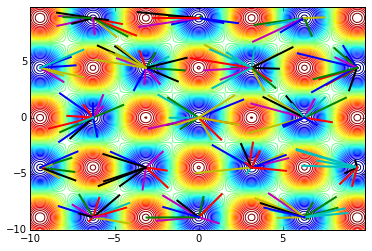

In [8]:
import mystic
mystic.model_plotter(mystic.models.griewangk, 'log.txt', bounds="-10:10:.1, -10:10:.1")

* Energy-surface interpolation

In short, for a unknown N-dimensional function, if one performs a global search for all mimima and all maxima... and saves the function evaluations to a database/cache, interpolation from the solver trajectories should interpolate more truly to the unknown function than a standard gridsearch.  Optimizers seek critical points, so those will be much better represented in the post-global search interpolation as opposed to post-gridding interpolation. 

**EXERCISE:** Convert one of out previous `mystic` optimizers to use parallel computing.  If the solver has a `SetMapper` method, it can take a parallel map.

**EXERCISE:** Something... maybe caching with klepto?

Let's now look at solvers for [optimization of probabilities](statistics.ipynb), PDFs, etc